In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.set_index('PassengerId', inplace=True)

In [5]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
print(df['Age'].mean())
print(df['Age'].median())  
# selecting median because in  aright skewed data the mean pulls the data towards high values

29.69911764705882
28.0


In [7]:
## handling missing values

df.drop('Cabin', axis=1, inplace=True)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Age'] = df['Age'].fillna(df['Age'].median())

In [8]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


In [10]:
#encoding 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])      # binary therefore labelencoding will work fine

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)   # for nominal variables one hot encoding

In [11]:
df['Sex'].info()

<class 'pandas.core.series.Series'>
Index: 891 entries, 1 to 891
Series name: Sex
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB


In [12]:
#creating new features
df['familysize'] = 1+ df['SibSp'] + df['Parch']

df['isAlone'] = df['familysize'].apply(lambda x:1 if x==1 else 0)

In [13]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked_Q', 'Embarked_S', 'familysize', 'isAlone'],
      dtype='object')

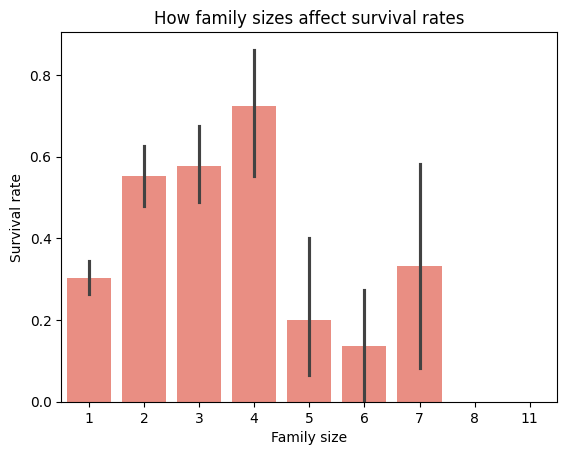

In [14]:
plt.title("How family sizes affect survival rates")
sns.barplot(data=df, x='familysize', y='Survived', color='salmon' )
plt.xlabel("Family size")
plt.ylabel("Survival rate")
plt.show()

In [15]:
df.corr

<bound method DataFrame.corr of              Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name  Sex   Age  \
PassengerId                                                                 
1                                      Braund, Mr. Owen Harris    1  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0   
3                                       Heikkinen, Miss. Laina    0  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0   
5                                     Allen, Mr. William Henry    1  35.0   

<Axes: >

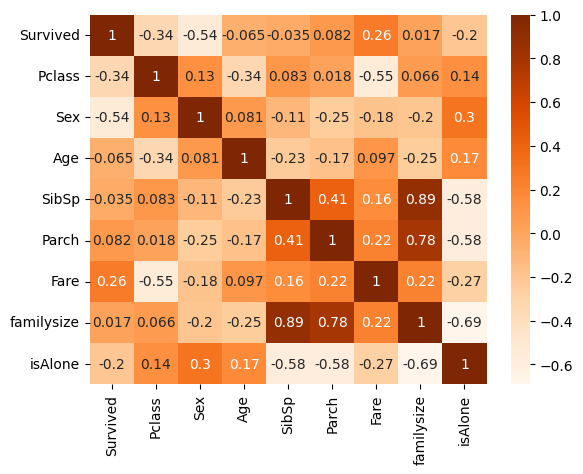

In [16]:
corr = df.select_dtypes('number').corr()

plt.Figure(figsize=(14,12))
sns.heatmap(corr,cmap='Oranges', annot=True)

In [17]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked_Q', 'Embarked_S', 'familysize', 'isAlone'],
      dtype='object')

In [18]:
X= df.drop(['Survived','Name','Ticket'], axis=1)
y= df['Survived']

MODEL TRAINING- LOGISTIC REGRESSION

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
X_train.shape , y_train.shape

((668, 10), (668,))

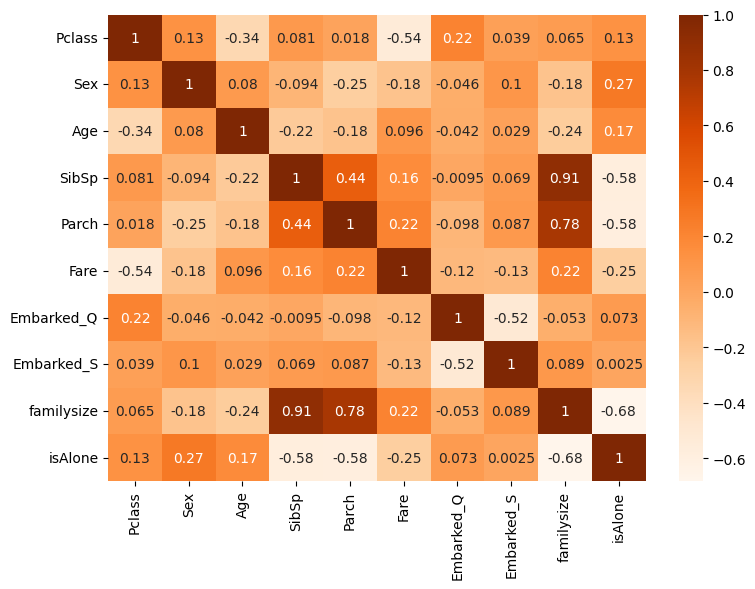

In [21]:
xtrain = X_train.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(xtrain,cmap='Oranges', annot=True)
plt.tight_layout()
plt.show()

In [22]:
# dropping on basics of corr
def corre(dataset,threshold):

    numeric_data = dataset.select_dtypes(include=['number'])

    col_corr = set()
    corr_matrix = numeric_data.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j] > threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [23]:
corr_features = corre(X_train,0.70)

In [24]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((668, 9), (223, 9))

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    int64  
 4   Age         891 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Ticket      891 non-null    object 
 8   Fare        891 non-null    float64
 9   Embarked_Q  891 non-null    bool   
 10  Embarked_S  891 non-null    bool   
 11  familysize  891 non-null    int64  
 12  isAlone     891 non-null    int64  
dtypes: bool(2), float64(2), int64(7), object(2)
memory usage: 85.3+ KB


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

logistic.fit(X_train_scaler, y_train)
y_pred = logistic.predict(X_test_scaler)

In [28]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0])

In [29]:
# performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7982062780269058
[[114  20]
 [ 25  64]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       134
           1       0.76      0.72      0.74        89

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



HYPERPARAMTER TUNING AND CROSS VALIDTION

In [30]:
model = LogisticRegression()

param_grid = [
    {'solver':['liblinear'] , 'penalty':['l1','l2'], 'C':[0.01,0.1,1,10,100]},

    {'solver':['lbfgs','newton-cg', 'newton-cholesky', 'sag'], 'penalty':['l2'], 'C':[0.01,0.1,1,10,100]}, 
    {'solver':['saga'] , 'penalty':['l1','l2'], 'C':[0.01,0.1,1,10,100]},
    {'solver':['saga'] , 'penalty':['elasticnet'], 'C':[0.01,0.1,1,10,100], 'l1_ratio': [0.5, 0.7]} 
]

In [31]:
params = dict(solver=param_grid,c=param_grid,penalty=param_grid)

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=-1)

In [33]:
grid

,estimator,LogisticRegression()
,param_grid,"[{'C': [0.01, 0.1, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}, {'C': [0.01, 0.1, ...], 'penalty': ['l2'], 'solver': ['lbfgs', 'newton-cg', ...]}, ...]"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [34]:
grid.fit(X_train_scaler,y_train)

,estimator,LogisticRegression()
,param_grid,"[{'C': [0.01, 0.1, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}, {'C': [0.01, 0.1, ...], 'penalty': ['l2'], 'solver': ['lbfgs', 'newton-cg', ...]}, ...]"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [35]:
y_pred = grid.predict(X_test_scaler)

In [36]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8026905829596412
[[115  19]
 [ 25  64]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       134
           1       0.77      0.72      0.74        89

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



In [37]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [38]:
grid.best_score_

np.float64(0.8023341936931881)

RANDOMIZED SEARCH CV

In [39]:
from sklearn.model_selection import RandomizedSearchCV

model = LogisticRegression()
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring='accuracy', cv=cv, n_jobs=-1)

In [40]:
grid.fit(X_train_scaler,y_train)
y_pred = grid.predict(X_test_scaler)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7982062780269058
[[114  20]
 [ 25  64]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       134
           1       0.76      0.72      0.74        89

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



In [41]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked_Q', 'Embarked_S', 'familysize', 'isAlone'],
      dtype='object')

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


# Numerical and categorical features
num_features = ['Age', 'Fare', 'familysize']
cat_features = ['Sex', 'Pclass']

# For numeric data: fill missing with median and scale
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# For categorical data: fill missing with most frequent and one-hot encode
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

# Combine preprocessing and model into one pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])
X = df[['Age', 'Fare', 'familysize', 'Sex',  'Embarked_Q', 'Embarked_S', 'Pclass']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


TESTING THE DATA

In [43]:
test_df = pd.read_csv("test.csv")

In [46]:
#encoding 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
test_df['Sex'] = le.fit_transform(test_df['Sex'])      # binary therefore labelencoding will work fine

test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)   # for nominal variables one hot encoding


In [48]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [50]:
X_test_final = test_df[['Age', 'Fare', 'Pclass', 'Sex', 'Embarked_Q', 'Embarked_S']].copy()

X_test_final['familysize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [51]:
predictions = pipeline.predict(X_test_final)


In [54]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7988826815642458
[[92 13]
 [23 51]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [57]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions
})

In [58]:
submission.to_csv('submission.csv', index=False)
